In [77]:
import pandas as pd
import numpy as np

import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from dateutil import parser
import matplotlib.pyplot as plt

def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))

        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')
        y.hist(bins = 20, ax = pp_ax)
        # scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return
# we will transform the first row of our data_set to columns
def transform_columns(path,columns,column):
    data = pd.read_csv(path)
    keys=data[column].fillna("").apply(lambda x: "_".join(x).replace(" ","_").rstrip("_"),axis=1)
    dates=[i for i in data.columns if i not in columns] 
    n=len(keys)
    all_series=[]
    for i in range(n):
        series=pd.DataFrame(data[dates].iloc[i].T)
        series.rename(columns = {i: keys.iloc[i]}, inplace = True)   
        all_series.append(series)
    series=pd.concat(all_series,axis=1).rename_axis('dates').reset_index()
    series['dates']=series['dates'].apply(lambda x: parser.parse(x))
    return series
# we will conserve the rows and add rows for index transform the first row of our data_set to columns
def transform_rows(path,output,columns):
    data = pd.read_csv(path)
    keys=data[columns]
    dates=[i for i in data.columns if i not in columns] 
    n=len(keys)
    all_series=[]
    for i in range(n):
        l=pd.DataFrame(data[dates].iloc[i].T)
        l.rename(columns = {i: "series"}, inplace = True)
        l[columns]=l.apply(lambda x: keys.iloc[i], axis = 1)
        l.rename_axis('dates').reset_index( inplace=True)
        l['dates']=l['dates'].apply(lambda x: parser.parse(x))
        all_series.append(l)
    return pd.concat(all_series,axis=0)

Loading data from :
https://raw.githubusercontent.com/YoungDevil-glitch/emines_ts/add_data/data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
confirmed covid cases 

In [78]:
data=pd.read_csv("https://raw.githubusercontent.com/YoungDevil-glitch/emines_ts/add_data/data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

In [79]:
data.sample(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21
223,NaN,Serbia,44.016500,21.005900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,287730,292640,296528,300062,303747,307827,312253,316344,320167,323367,326060,328619,331755,334991,337923,339997,341904,343870,346585,349238,352120,353907,356125,356125,359689,361782,363924,366191,368072,369823,371216,372533,374111,375799,377445,379093,380802,382285,383603,385126
162,NaN,Laos,19.856270,102.495496,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,44
146,NaN,India,20.593684,78.962880,0,0,0,0,0,0,0,0,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,9979447,10004599,10031223,10055560,10075116,10099066,10123778,10146845,10169118,10187850,10207871,10224303,10244852,10266674,10266674,10286709,10323965,10340469,10356844,10374932,10395278,10413417,10413417,10450284,10466595,10479179,10495147,10512093,10527683,10542841,10557985,10571773,10581823,10595639,10610883,10625428,10639684,10654533,10667736,10676838
49,Ontario,Canada,51.253800,-85.323200,0,0,0,0,1,1,1,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,...,152898,155180,157749,159871,162052,164318,166802,169137,169694,171892,173655,176814,179198,183104,186355,187344,191035,195368,198929,202085,205283,208691,212962,216674,220394,223857,226609,229854,233065,236127,239066,242339,244883,247144,249753,252542,255074,257403,259647,261594
57,NaN,Chile,-35.675100,-71.543000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,...,578732,581135,583355,585546,587993,589189,590914,594152,595831,598394,600105,602028,603986,606950,608973,612564,615902,618191,620641,623101,625483,629176,633381,637742,641923,645892,649135,652525,656712,661180,665493,669832,673750,677151,680740,685107,690066,694647,699110,703178


Les colonnes de notre dataset sont des dates.
transformons le dataset  

In [80]:
new_data=transform_columns(path="https://raw.githubusercontent.com/YoungDevil-glitch/emines_ts/add_data/data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv",
                           columns="Province/State 	Country/Region 	Lat 	Long".split(" 	"),
                           column="Country/Region,Province/State".split(","))

In [81]:
new_data.sample(5)

,dates,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua_and_Barbuda,Argentina,Armenia,Australia_Australian_Capital_Territory,Australia_New_South_Wales,Australia_Northern_Territory,Australia_Queensland,Australia_South_Australia,Australia_Tasmania,Australia_Victoria,Australia_Western_Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia_and_Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina_Faso,Burma,Burundi,Cabo_Verde,Cambodia,Cameroon,...,Spain,Sri_Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad_and_Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United_Arab_Emirates,United_Kingdom_Anguilla,United_Kingdom_Bermuda,United_Kingdom_British_Virgin_Islands,United_Kingdom_Cayman_Islands,United_Kingdom_Channel_Islands,United_Kingdom_Falkland_Islands_(Malvinas),United_Kingdom_Gibraltar,United_Kingdom_Isle_of_Man,United_Kingdom_Montserrat,United_Kingdom_Turks_and_Caicos_Islands,United_Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West_Bank_and_Gaza,Yemen,Zambia,Zimbabwe
91,2020-04-22,1177,634,2910,723,25,24,3144,1473,104,2971,28,1024,438,205,1336,546,14925,1518,65,2027,3772,75,7281,41889,18,54,6,609,1368,22,45757,138,1024,609,123,11,73,122,1163,...,208389,330,140,10,16553,28268,42,426,0,284,2826,23,88,115,909,98674,854205,63,6592,8238,3,99,5,66,498,11,132,307,11,11,140397,549,1716,0,288,268,335,1,74,28
5,2020-01-27,0,0,0,0,0,0,0,0,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,5,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
213,2020-08-22,37944,8275,41068,1045,2134,94,336802,42616,113,3985,33,1105,462,230,18231,652,25062,35105,1765,49038,292625,158,70285,81468,668,2115,155,108427,17715,1308,3582362,143,15131,1297,441,429,3455,273,18762,...,386054,2947,12682,3569,83114,39627,2143,487,8277,509,3390,26,1275,930,2738,257032,5664358,2166,105337,66617,3,167,21,205,614,13,239,336,13,383,324601,1521,38532,0,38957,1014,18476,1907,10831,5893
143,2020-06-13,24106,1464,10810,853,138,26,30295,16004,108,3128,29,1065,440,228,1720,602,17078,9570,103,17713,84379,96,53241,59918,20,412,66,17842,2893,60,850514,141,3266,892,261,85,726,128,8681,...,243605,1884,7007,196,51409,31094,170,443,4971,509,3134,24,530,117,1094,176677,2073978,694,31177,41990,3,142,8,187,565,13,176,336,11,12,270597,847,4966,0,2904,334,489,705,1357,356
260,2020-10-08,39616,14899,52658,2568,5958,111,856369,54473,113,4271,33,1160,472,230,20257,690,52057,41304,4713,74422,374592,203,81982,143596,2373,2411,304,137969,29528,3219,5028444,146,23259,2241,22445,515,6717,281,21203,...,848324,4488,13670,5004,97532,58881,4566,524,10097,509,3628,28,1907,4963,26899,330753,7610169,9442,251243,102929,3,182,71,214,699,13,452,345,13,695,561815,2226,60026,0,81019,1100,43256,2050,15301,7951


In [82]:
for i  in new_data.columns:
    print(i)

dates
Afghanistan
Albania
Algeria
Andorra
Angola
Antigua_and_Barbuda
Argentina
Armenia
Australia_Australian_Capital_Territory
Australia_New_South_Wales
Australia_Northern_Territory
Australia_Queensland
Australia_South_Australia
Australia_Tasmania
Australia_Victoria
Australia_Western_Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia_and_Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina_Faso
Burma
Burundi
Cabo_Verde
Cambodia
Cameroon
Canada_Alberta
Canada_British_Columbia
Canada_Diamond_Princess
Canada_Grand_Princess
Canada_Manitoba
Canada_New_Brunswick
Canada_Newfoundland_and_Labrador
Canada_Northwest_Territories
Canada_Nova_Scotia
Canada_Nunavut
Canada_Ontario
Canada_Prince_Edward_Island
Canada_Quebec
Canada_Repatriated_Travellers
Canada_Saskatchewan
Canada_Yukon
Central_African_Republic
Chad
Chile
China_Anhui
China_Beijing
China_Chongqing
China_Fujian
China_Gansu
China_Guangdong
China_Guangxi
China_Guizhou
China_Haina

In [83]:
series = pd.Series(data=new_data["China_Beijing"].values,index=new_data["dates"])

In [84]:
series

dates
2020-01-22      14
2020-01-23      22
2020-01-24      36
2020-01-25      41
2020-01-26      68
              ... 
2021-01-21    1020
2021-01-22    1023
2021-01-23    1025
2021-01-24    1028
2021-01-25    1030
Length: 370, dtype: int64

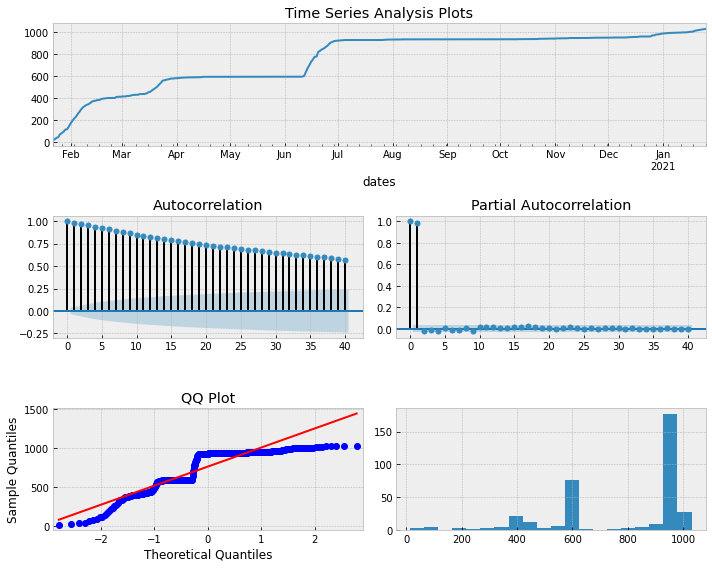

In [85]:
tsplot(series, lags=40, figsize=(10, 8), style='bmh')

# TODO

- charger la serie temporelle
- plot
- tester si c'est un white noise: ljung box
- tester si c'est stationnaire

# AR(p) ?

- regarder PACF (partial autocorrelation)
- determiner l'ordre p du processus AR(p)

- calculer les coefficients d'autocorrelation
- trouver coefficients AR(p) avec Yule Walker

# MA(q) ?

- regarder ACF ( autocorrelation)
- determiner l'ordre q du processus MA(q)

- statsmodel fitter un processus ARMA

# Differencing - stationarisation

processus $d_t = x_t - x_{t-1}$

In [86]:
?series.plot

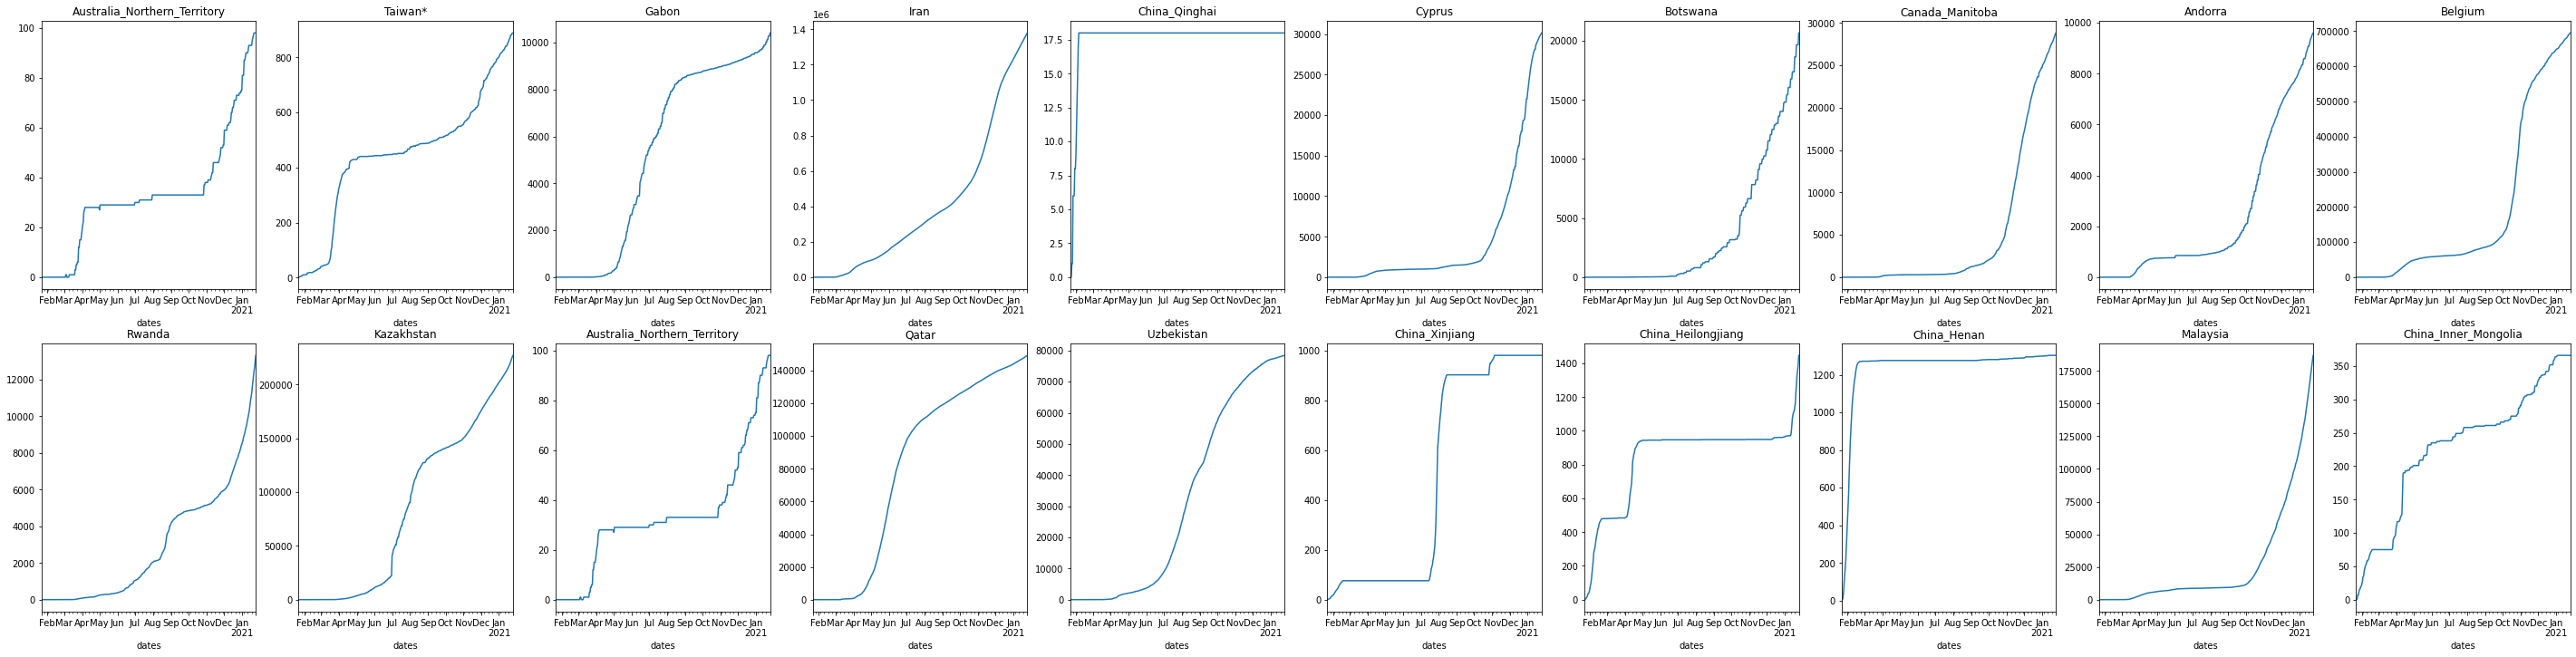

In [87]:
import numpy as np
n=20
index= np.random.randint(1,len(new_data.columns),n)
m=n//2
fig,axs  = plt.subplots(2,m,figsize=(5*m,12))
j=0
for i in index:
    series = pd.Series(data=new_data[new_data.columns[i]].values,index=new_data["dates"])
    h,k=j//m,j%m
    series.plot(ax=axs[h][k],y="confirmed_cases",x="dates",title=new_data.columns[i])
    j+=1

plot noise

In [88]:
import statsmodels.api as sm
values=[]
for i in range(1,len(new_data.columns)):
    series = pd.Series(data=new_data[new_data.columns[i]].values,index=new_data["dates"])
    res = sm.stats.acorr_ljungbox(series)
    values.append(res[1][0])
test_1=pd.Series(data=values,index=new_data.columns[1:])

273


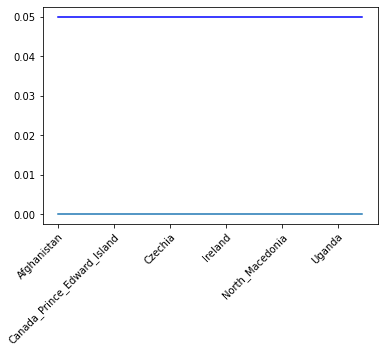

In [89]:
fig,ax =plt.subplots(1,1,)
test_1.plot(ax=ax,y="p_value",kind="line")
ax.plot(range(len(test_1)),[0.05]*len(test_1),"-b")
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.xticks( rotation=45)
print(len(test_1))

Pour toutes nos Series, on rejette l'hypothese H0. Les series ne sont pas des bruits Gaussien



1. la moyenne dépend du temps.
2. la variance aussi

Mais verifions que le test ADF confirme que la serie n'est pas stationnaire.

Si p-value >> 0.5 alors il y a une unit root et la serie n'est pas stationnaire



In [90]:
from statsmodels.tsa.stattools import adfuller
values=[]
for i in range(1,len(new_data.columns)):
    series = pd.Series(data=new_data[new_data.columns[i]].values,index=new_data["dates"])
    res = adfuller(series)
    values.append(res[1])
test_2=pd.Series(data=values,index=new_data.columns[1:])
    

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:867: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


273


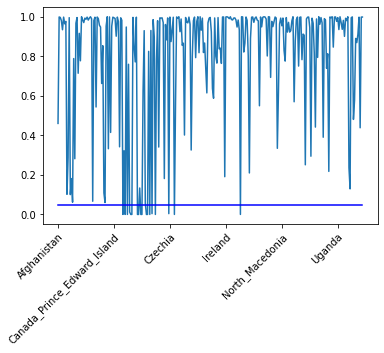

In [91]:
fig,ax =plt.subplots(1,1,)
test_2.plot(ax=ax,y="p_value",kind="line")
ax.plot(range(len(test_2)),[0.05]*len(test_2),"-b")
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.xticks( rotation=45)
print(len(test_2))

Nos Series sont en general non-stationnaires, avec quelques cas de speciaux. plottons les.

['China_Anhui', 'China_Chongqing', 'China_Gansu', 'China_Guangxi', 'China_Guizhou', 'China_Hainan', 'China_Hubei', 'China_Hunan', 'China_Jiangsu', 'China_Jiangxi', 'China_Ningxia', 'China_Qinghai', 'China_Shandong', 'China_Shanxi', 'China_Tibet', 'Cyprus', 'Diamond_Princess', 'Latvia']


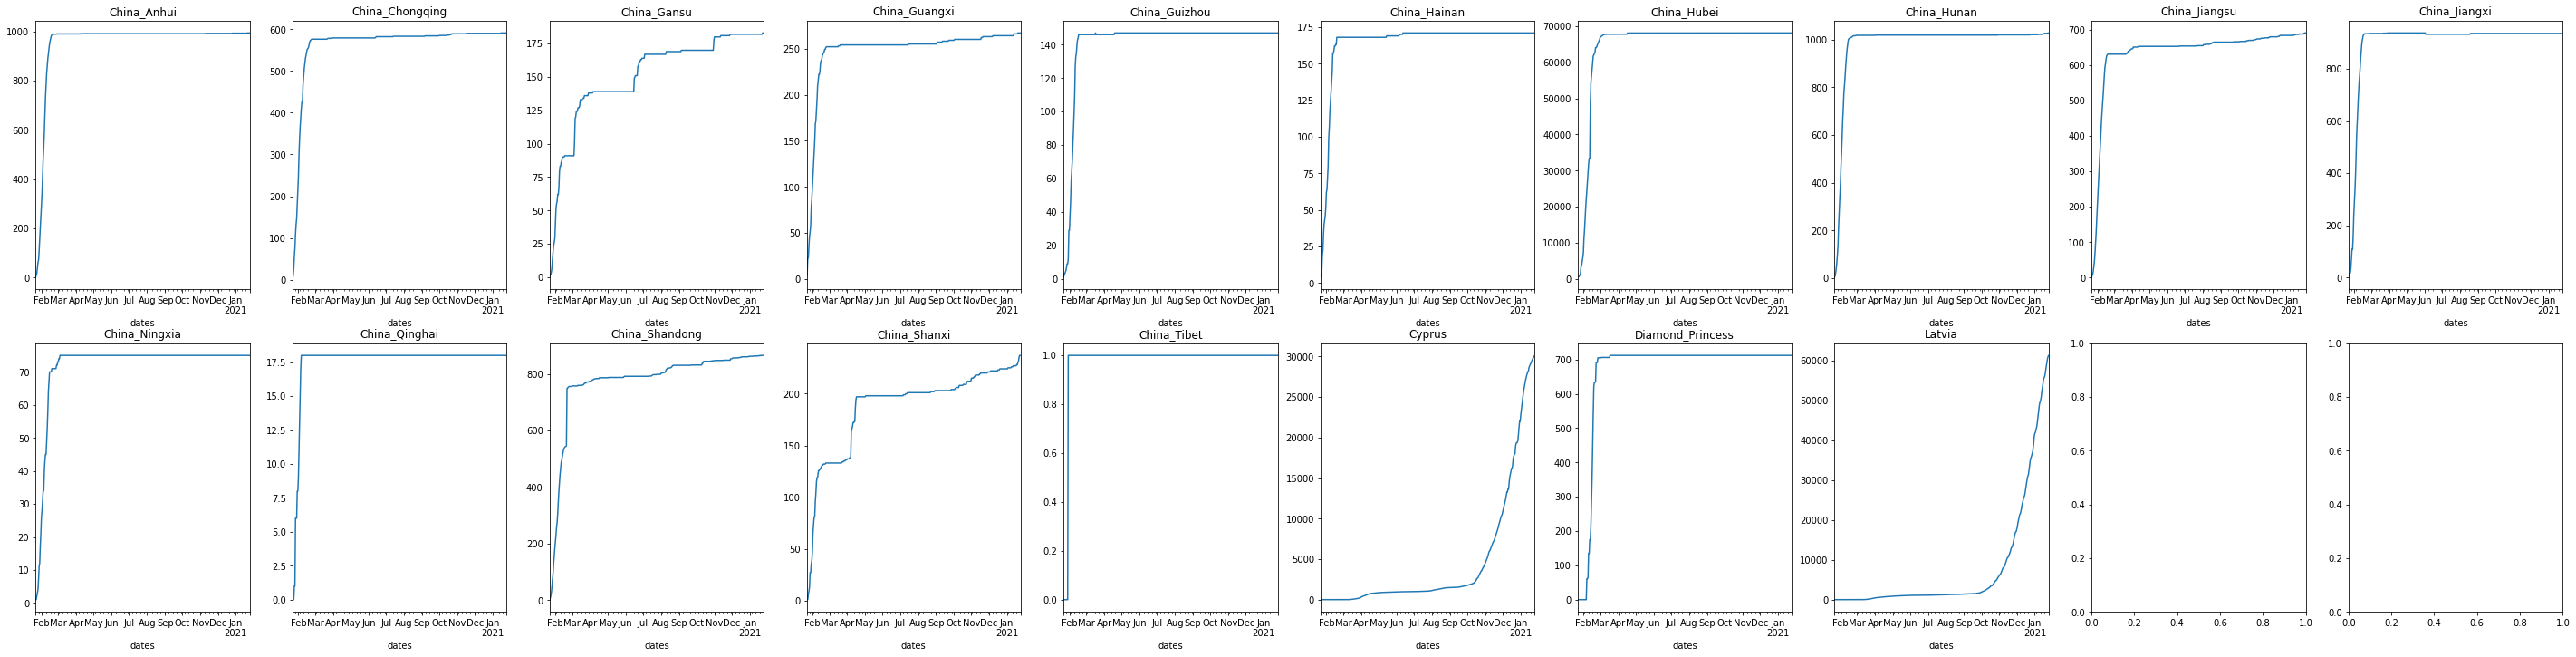

In [92]:
cols = list(test_2.loc[test_2.apply(lambda x: x<=0.05)].index)
print(cols)
n=len(cols)
m=n//2+1
fig,axs  = plt.subplots(2,m,figsize=(5*m,12))
for i in range(n):
    series = pd.Series(data=new_data[cols[i]].values,index=new_data["dates"])
    h,k=i//m,i%m
    series.plot(ax=axs[h][k],y="confirmed_cases",x="dates",title=cols[i])


Test kpss

In [93]:
from statsmodels.tsa.stattools import kpss
values=[]
for i in range(1,len(new_data.columns)):
    series = pd.Series(data=new_data[new_data.columns[i]].values,index=new_data["dates"])
    res = kpss(series,lags=2)
    values.append(res[1])
test_3=pd.Series(data=values,index=new_data.columns[1:])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than 

273


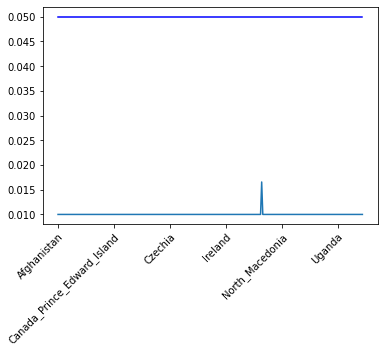

In [94]:
fig,ax =plt.subplots(1,1,)
test_3.plot(ax=ax,y="p_value",kind="line")
ax.plot(range(len(test_3)),[0.05]*len(test_3),"-b")
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.xticks( rotation=45)
print(len(test_3))

pour toutes nos series la p-value du test est $< 0.05$, on peut rejetter l'hypothese HO. la serie n'est strationaire

# AR(p) ?

- regarder PACF (partial autocorrelation)
- determiner l'ordre p du processus AR(p)

- calculer les coefficients d'autocorrelation
- trouver coefficients AR(p) avec Yule Walker



```
# This is formatted as code
```
Partial correlation


In [95]:
?smt.graphics.plot_pacf

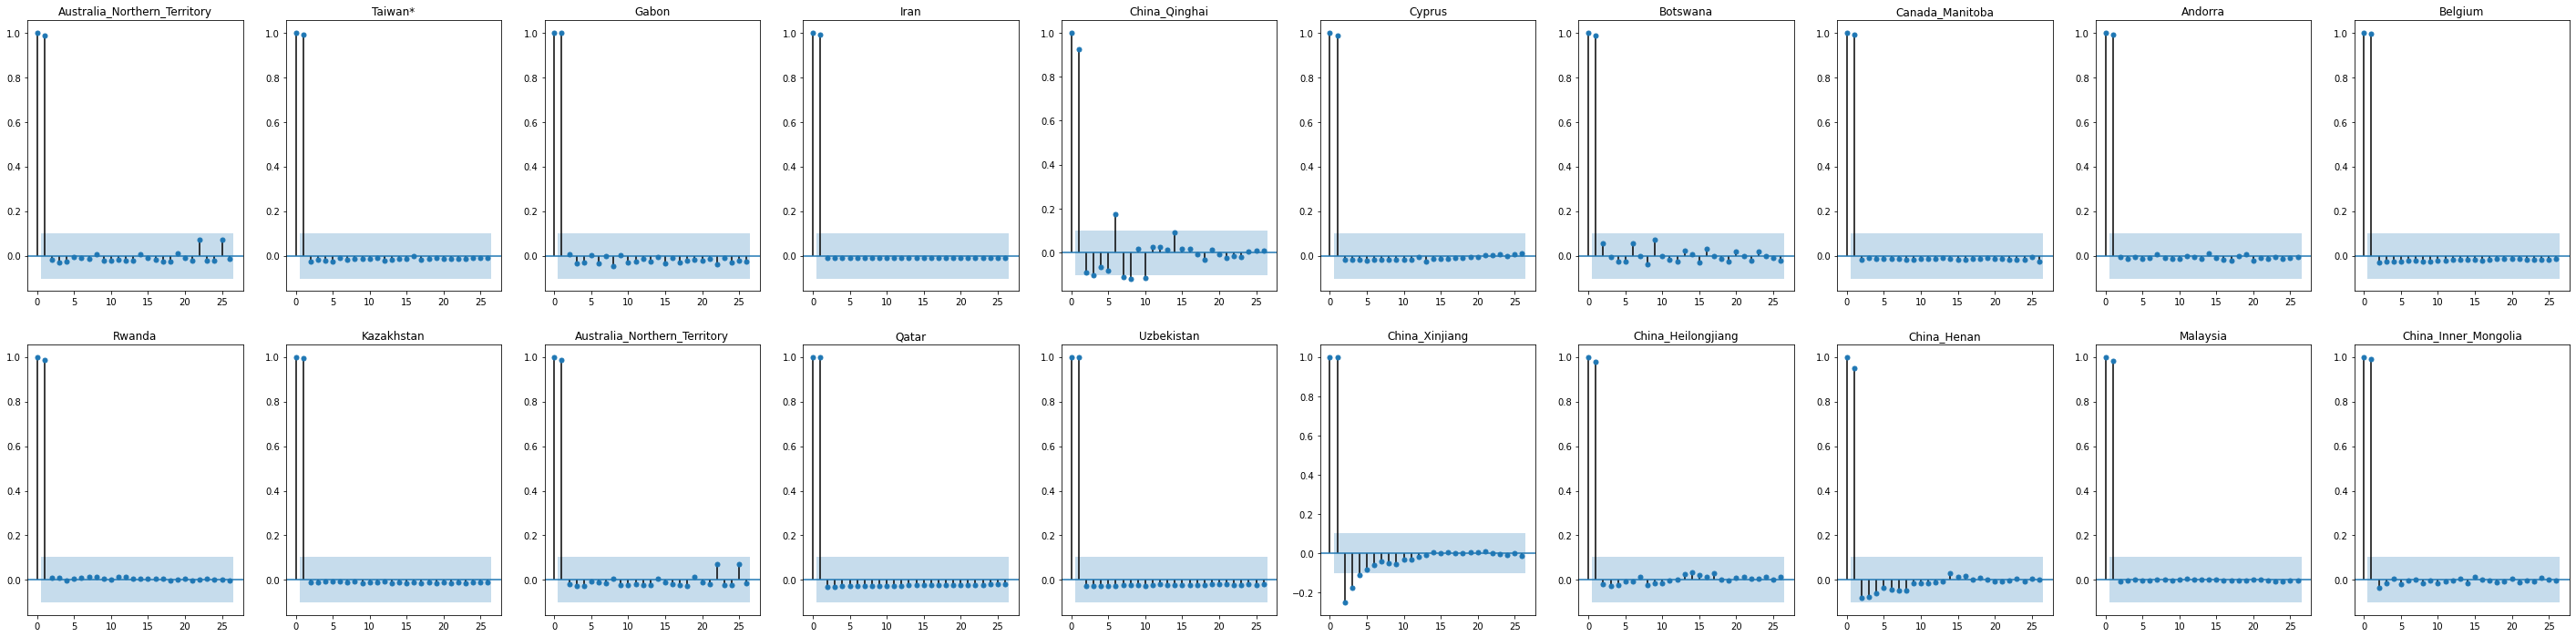

In [96]:
import statsmodels.tsa.api as smt
fig,axs  = plt.subplots(2,m,figsize=(5*m,12))
j=0
for i in index:
    series = pd.Series(data=new_data[new_data.columns[i]].values,index=new_data["dates"])
    h,k=j//m,j%m
    smt.graphics.plot_pacf(series.values,ax=axs[h][k],title=new_data.columns[i])
    j+=1

En general on observe deux pics. donc l'ordre de ar est  1 
le coefficient d'autocorrelation est en general proche de 1

In [97]:
from statsmodels.tsa.stattools import acf,pacf
values=[]
for i in range(1,len(new_data.columns)):
    series = pd.Series(data=new_data[new_data.columns[i]].values,index=new_data["dates"])
    res = pacf(series)
    values.append(res[1])
test_4=pd.Series(data=values,index=new_data.columns[1:])

273


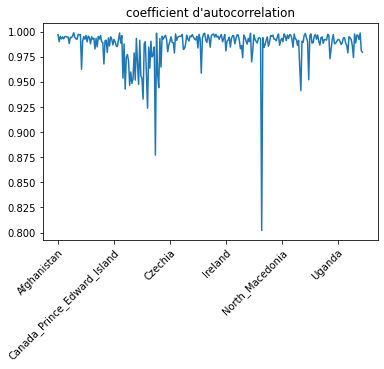

In [98]:
fig,ax =plt.subplots(1,1,)
test_4.plot(ax=ax,y="p_value",kind="line",title="coefficient d'autocorrelation")
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.xticks( rotation=45)
print(len(test_2))

Le coeeficient de correlation est $>0.8$

coeficients de AR(p)

In [99]:
from statsmodels.regression.linear_model import yule_walker
values=[]
values_2=[]
for i in range(1,len(new_data.columns)):
    series = pd.Series(data=new_data[new_data.columns[i]].values,index=new_data["dates"])
    rho, sigma = yule_walker(series, order=1 , method="mle")
    values.append(rho[0])
    values_2.append(sigma)
test_5=pd.Series(data=values,index=new_data.columns[1:])
test_6=pd.Series(data=values_2,index=new_data.columns[1:])

273
273


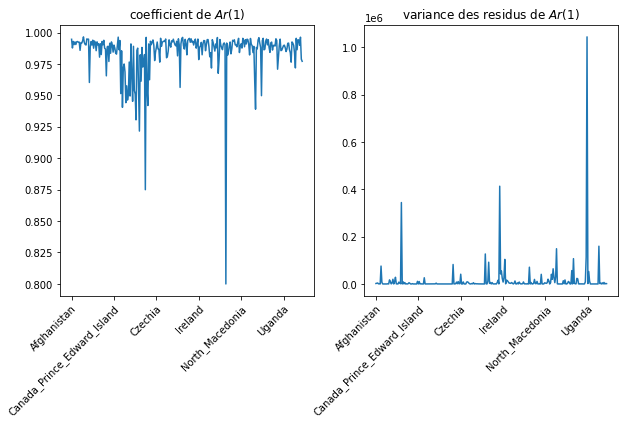

In [100]:
fig,ax =plt.subplots(1,2,figsize=(10,5))
test_5.plot(ax=ax[0],y="p_value",kind="line",title=r"coefficient de $Ar(1)$")
# Rotate the tick labels and set their alignment.
plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.xticks( rotation=45)
print(len(test_5))
test_6.plot(ax=ax[1],y="p_value",kind="line",title=r"variance des residus de $Ar(1)$")
# Rotate the tick labels and set their alignment.
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.xticks( rotation=45)
print(len(test_6))

#MA(q) ?

    regarder ACF ( autocorrelation)

    determiner l'ordre q du processus MA(q)

    statsmodel fitter un processus ARMA

regarder ACF ( autocorrelation)

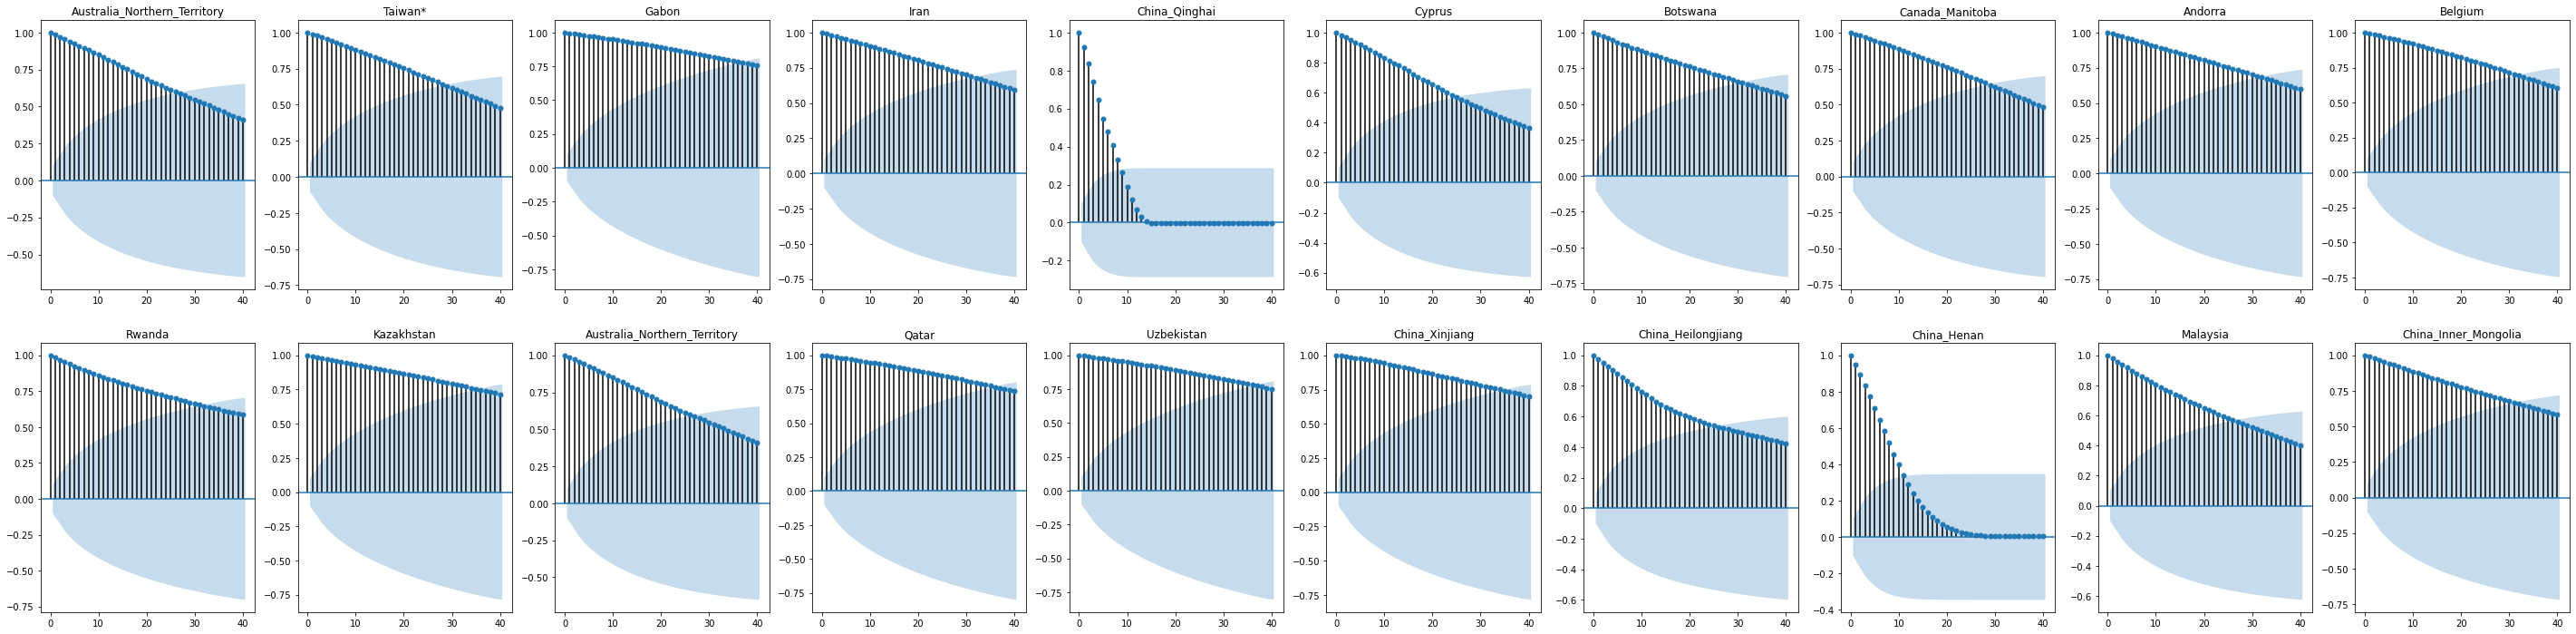

In [101]:
fig,axs  = plt.subplots(2,m,figsize=(5*m,12))
j=0
for i in index:
    series = pd.Series(data=new_data[new_data.columns[i]].values,index=new_data["dates"])
    h,k=j//m,j%m
    smt.graphics.plot_acf(series.values,ax=axs[h][k],title=new_data.columns[i],lags=40)
    j+=1

les processus presentent une autocorelation similaire a une marche aleatoire. l'ordre q du processus Ma est grand
on va prendre l'odre=0





Modelisation Arma


In [102]:
?ARMA.fit

In [103]:
?ARMA

In [104]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(series, (1, 0)).fit(trend='nc', disp=0)
print(model.params)

ar.L1.y    1.0
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [105]:
model = ARMA(series, (0, 5)).fit(trend='nc', disp=0)
print(model.params)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ma.L1.y    3.166234
ma.L2.y    5.007908
ma.L3.y    4.773237
ma.L4.y    2.727321
ma.L5.y    0.767834
dtype: float64


In [106]:
kpss(model.resid)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


(1.916788671633509,
 0.01,
 17,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

In [107]:
model.params[1]

5.007907874103615

In [108]:
values=[]
values_1=[]
values_2=[]
for i in range(1,len(new_data.columns)):
    series = pd.Series(data=new_data[new_data.columns[i]].values,index=new_data["dates"])
    model = ARMA(series, (1, 0)).fit(trend='nc', disp=0)
    values.append(model.params[0])
    values_1.append(adfuller(model.resid)[1])
    values_2.append(kpss(model.resid)[1])
test_7=pd.Series(data=values,index=new_data.columns[1:])
test_8=pd.Series(data=values_1,index=new_data.columns[1:])
test_9=pd.Series(data=values_2,index=new_data.columns[1:])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided

273
273
273


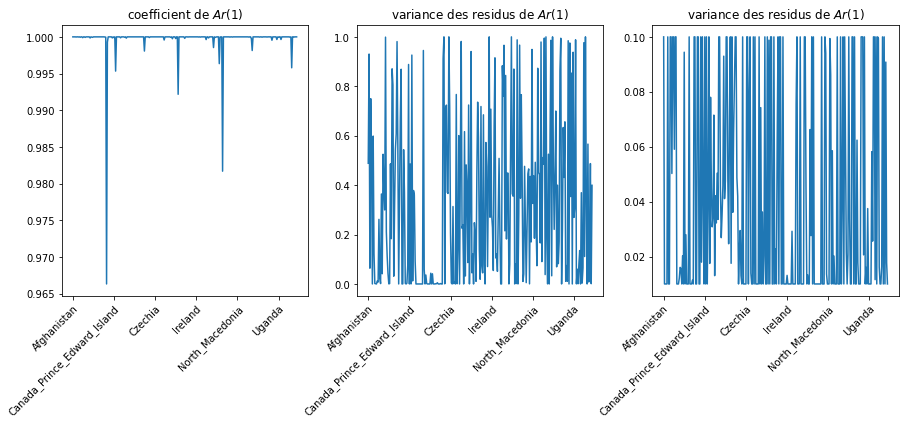

In [109]:
fig,ax =plt.subplots(1,3,figsize=(15,5))
test_7.plot(ax=ax[0],y="p_value",kind="line",title=r"coefficient de $Ar(1)$")
# Rotate the tick labels and set their alignment.
plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.xticks( rotation=45)
print(len(test_7))
test_8.plot(ax=ax[1],y="p_value",kind="line",title=r"variance des residus de $Ar(1)$")
# Rotate the tick labels and set their alignment.
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.xticks( rotation=45)
print(len(test_8))
test_9.plot(ax=ax[2],y="p_value",kind="line",title=r"variance des residus de $Ar(1)$")
# Rotate the tick labels and set their alignment.
plt.setp(ax[2].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.xticks( rotation=45)
print(len(test_9))

Some residus are not stationnary.

Differentiation

0.399782052360868


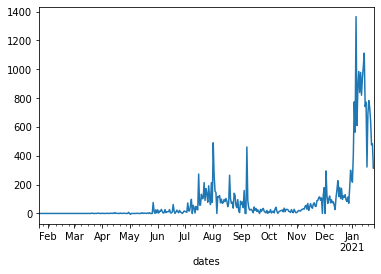

In [110]:
d1=series.diff()
d1=d1.loc[~d1.isna()]
res=adfuller(d1)
print(f"{res[1]}")
d1.plot()

afficher df 

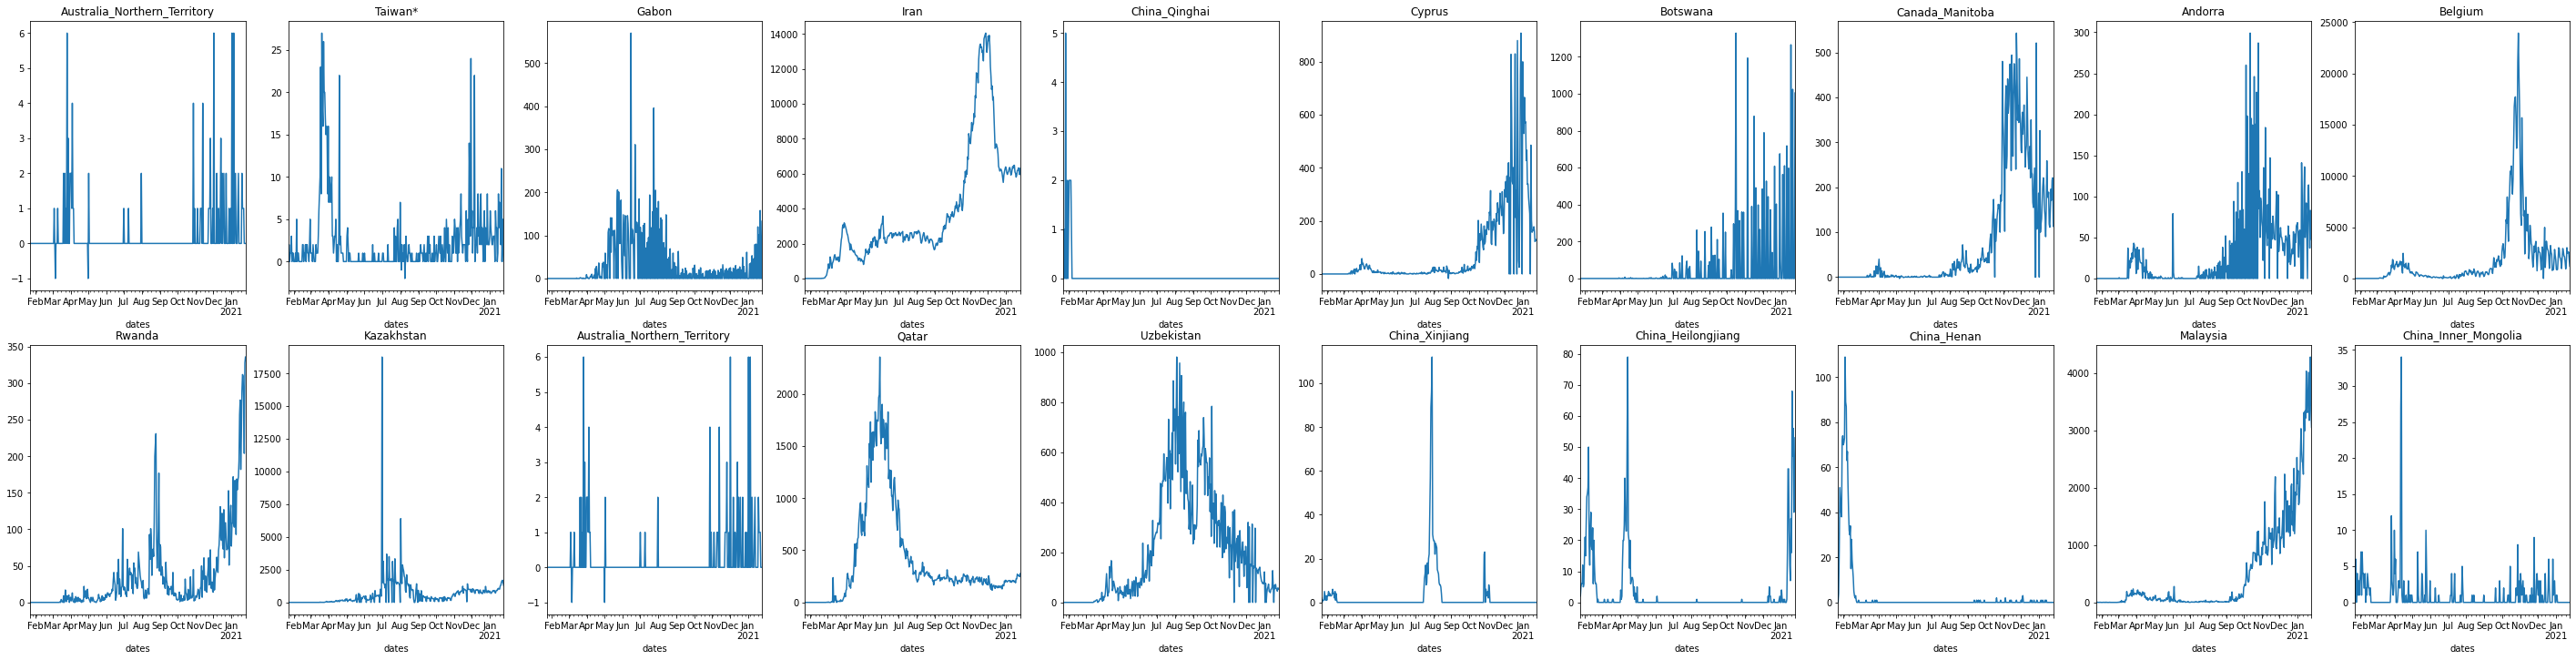

In [111]:
fig,axs  = plt.subplots(2,m,figsize=(5*m,12))
j=0
for i in index:
    series = pd.Series(data=new_data[new_data.columns[i]].values,index=new_data["dates"]).diff()
    series = series.loc[~series.isna()]
    h,k=j//m,j%m
    series.plot(ax=axs[h][k],title=new_data.columns[i])
    j+=1

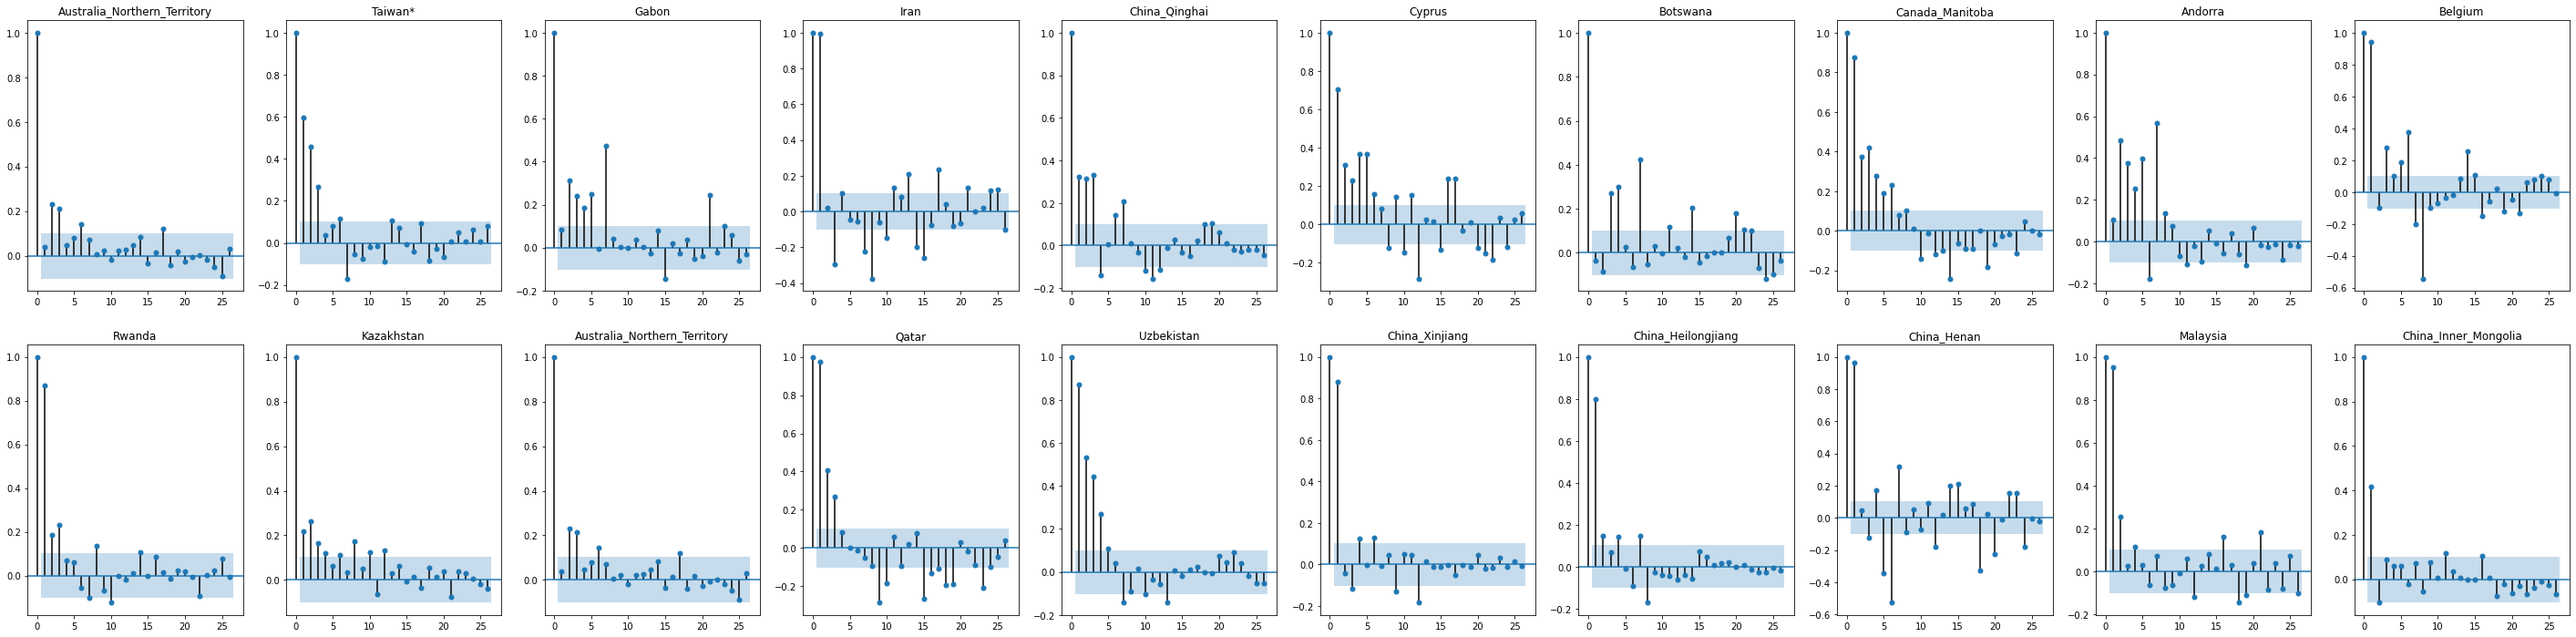

In [112]:
fig,axs  = plt.subplots(2,m,figsize=(5*m,12))
j=0
for i in index:
    series = pd.Series(data=new_data[new_data.columns[i]].values,index=new_data["dates"]).diff()
    series = series.loc[~series.isna()]
    h,k=j//m,j%m
    smt.graphics.plot_pacf(series.values,ax=axs[h][k],title=new_data.columns[i])
    j+=1

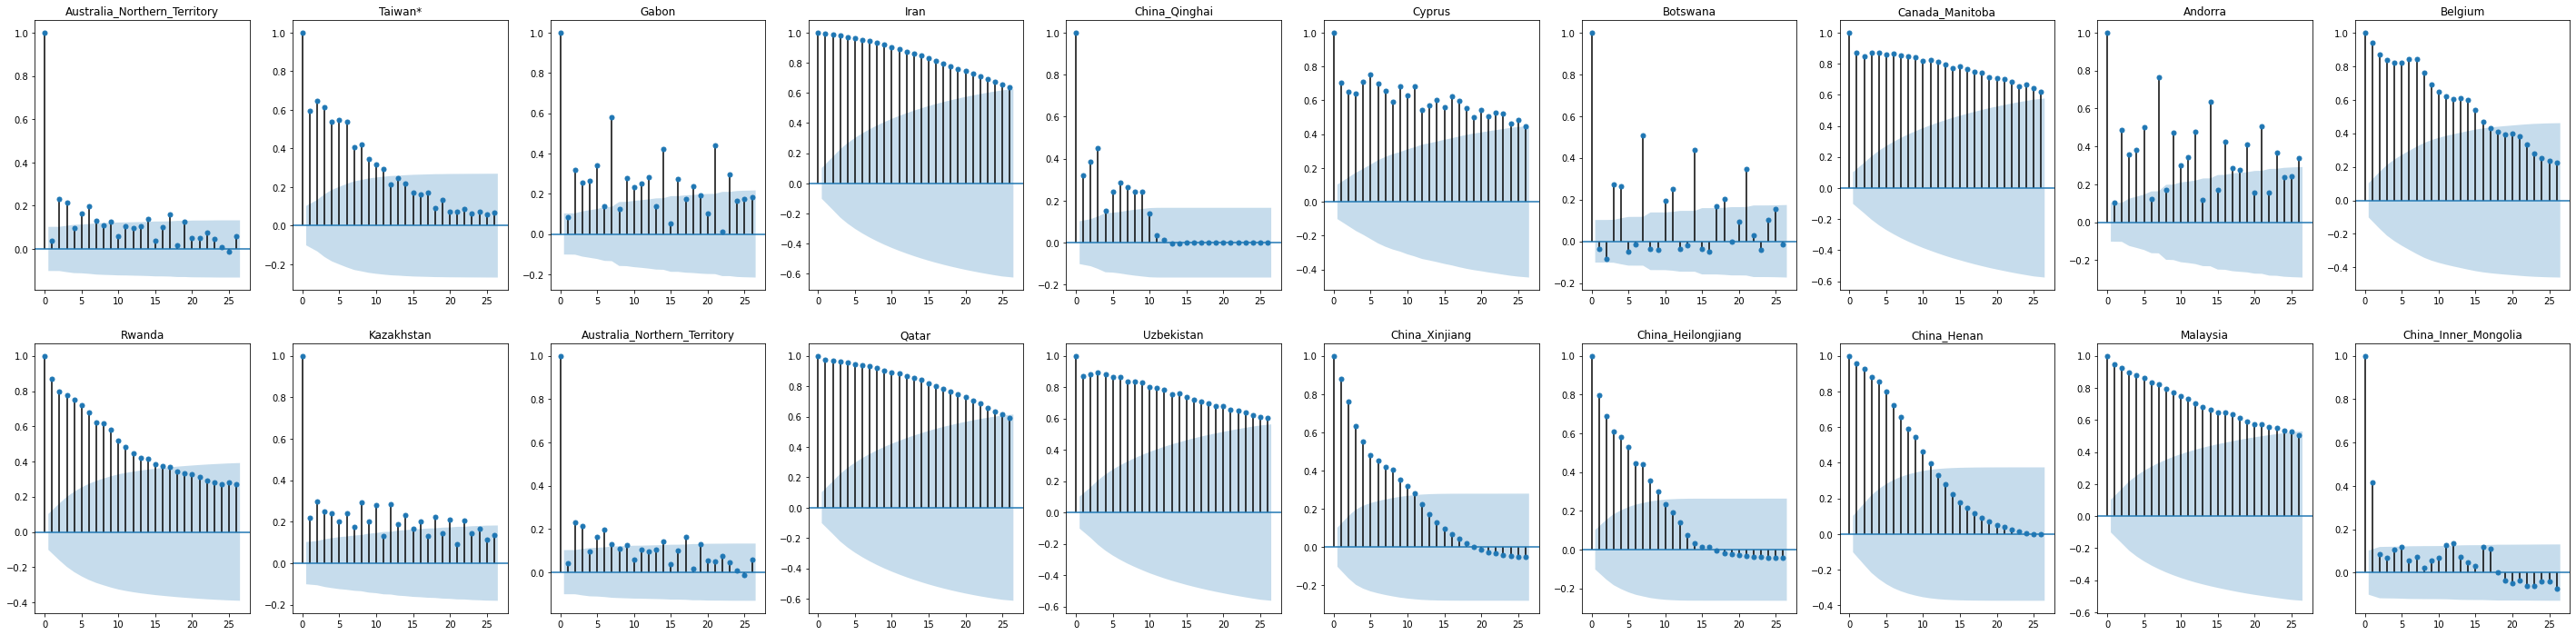

In [113]:
fig,axs  = plt.subplots(2,m,figsize=(5*m,12))
j=0
for i in index:
    series = pd.Series(data=new_data[new_data.columns[i]].values,index=new_data["dates"]).diff()
    series = series.loc[~series.isna()]
    h,k=j//m,j%m
    smt.graphics.plot_acf(series.values,ax=axs[h][k],title=new_data.columns[i])
    j+=1

In [114]:
values=[]
values_1=[]
for i in range(1,len(new_data.columns)):
    series = pd.Series(data=new_data[new_data.columns[i]].values,index=new_data["dates"]).diff()
    series = series.loc[~series.isna()]
    values.append(adfuller(series)[1])
    values_1.append(kpss(series)[1])
test_10=pd.Series(data=values,index=new_data.columns[1:])
test_11=pd.Series(data=values_1,index=new_data.columns[1:])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-valu

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text major ticklabel objects>)

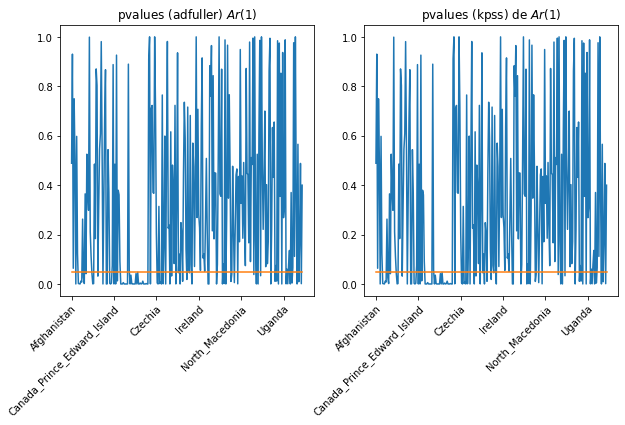

In [115]:
fig,ax =plt.subplots(1,2,figsize=(10,5))
test_10.plot(ax=ax[0],y="p_value",kind="line",title=r"pvalues (adfuller) $Ar(1)$")
ax[0].plot(range(len(test_10)),[0.05]*len(test_10))
# Rotate the tick labels and set their alignment.
plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.xticks( rotation=45)
test_10.plot(ax=ax[1],y="p_value",kind="line",title=r"pvalues (kpss) de $Ar(1)$")
ax[1].plot(range(len(test_10)),[0.05]*len(test_10))
# Rotate the tick labels and set their alignment.
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.xticks( rotation=45)

Some diff() are not stationnary so we will list them

In [116]:
to_rediff1= list(test_10.loc[test_10.apply(lambda x: x<=0.05)].index)
to_rediff2= list(test_11.loc[test_11.apply(lambda x: x>0.05)].index)
len(to_rediff1),len(to_rediff2)

(96, 94)

In [117]:
conflicts=[i for i in to_rediff1 if i not in to_rediff2]
conflicts+=[i for i in to_rediff2 if i not in to_rediff1]
len(list(set(conflicts)))

62

In [118]:
Non_Stationnary=[i for i in to_rediff1 if i not in conflicts]

testing non conflicted

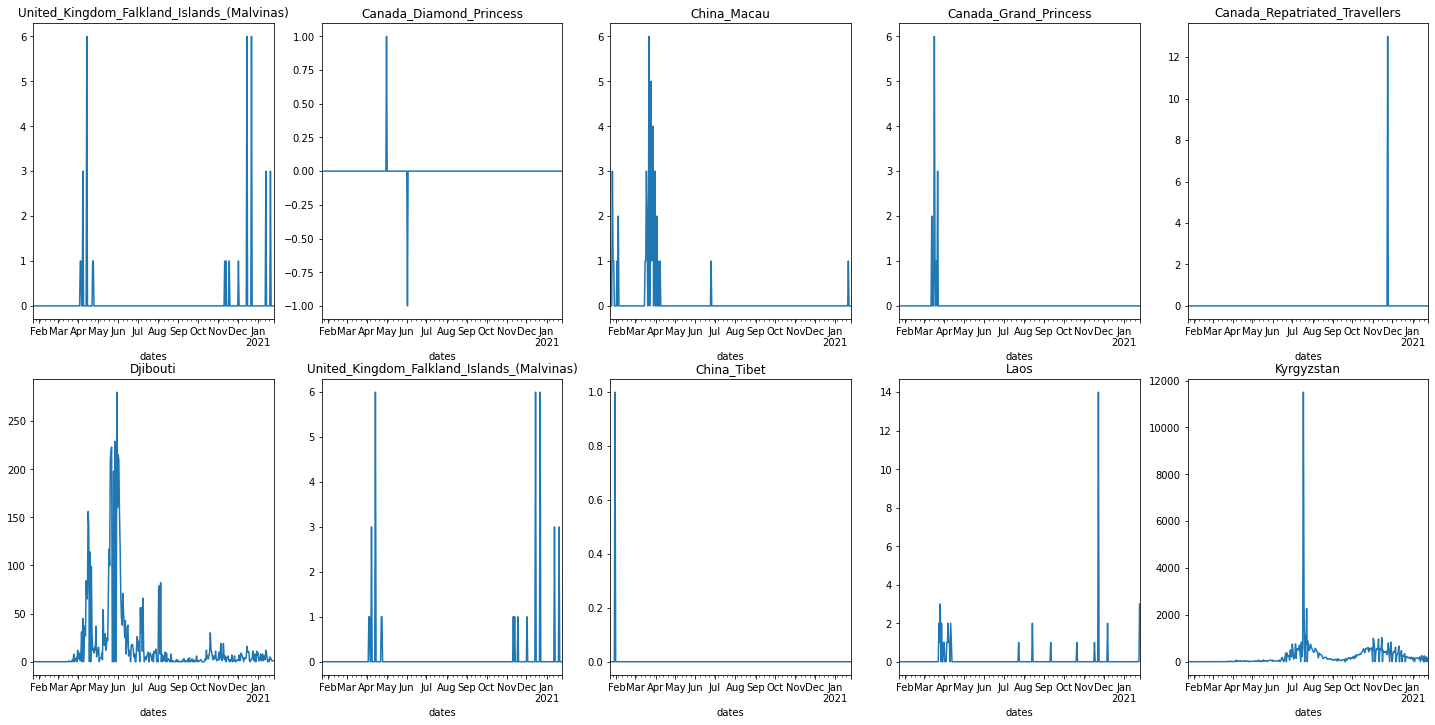

In [119]:
number=10
middle=number//2
indice=np.random.randint(0,len(Non_Stationnary),number)
fig,axs  = plt.subplots(2,middle,figsize=(5*middle,12))
j=0
for i in indice:
    series = pd.Series(data=new_data[Non_Stationnary[i]].values,index=new_data["dates"]).diff()
    series = series.loc[~series.isna()]
    h,k=j//middle,j%middle
    series.plot(ax=axs[h][k],title=Non_Stationnary[i])
    j+=1

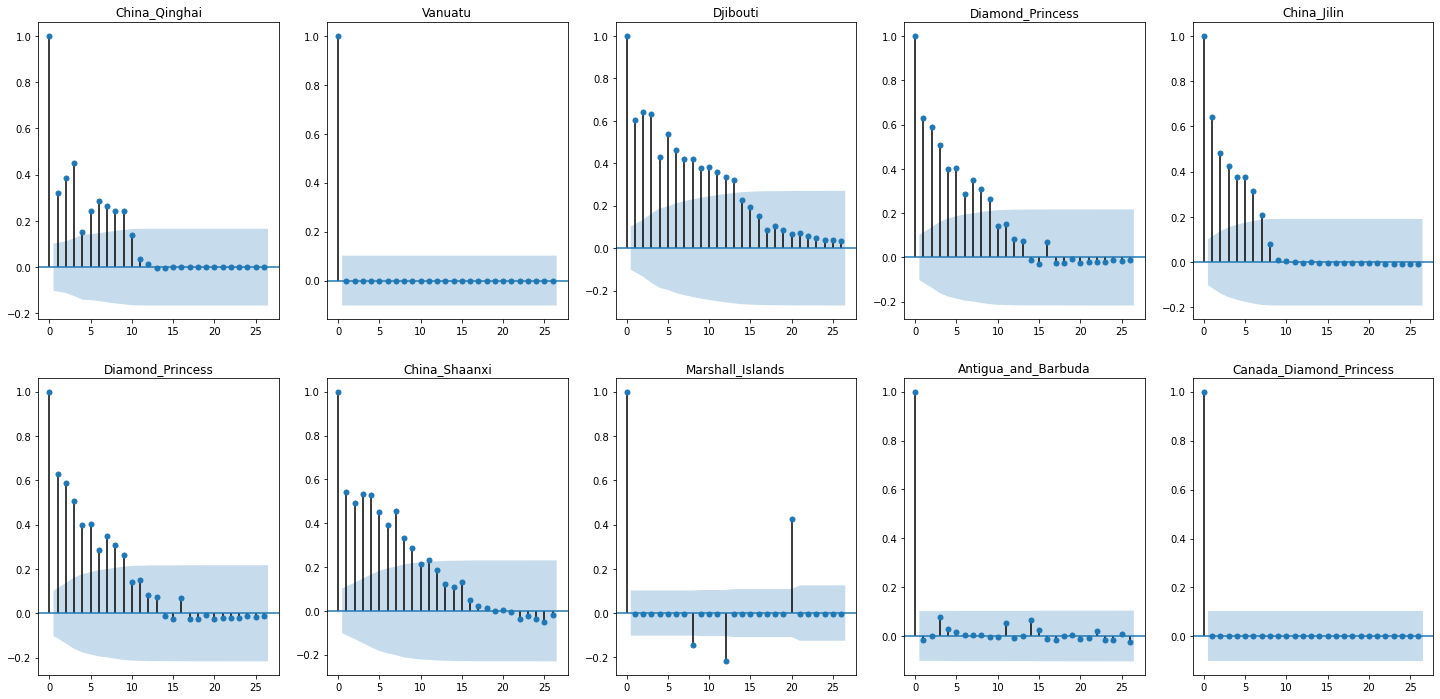

In [120]:
number=10
middle=number//2
indice=np.random.randint(0,len(Non_Stationnary),number)
fig,axs  = plt.subplots(2,middle,figsize=(5*middle,12))
j=0
for i in indice:
    series = pd.Series(data=new_data[Non_Stationnary[i]].values,index=new_data["dates"]).diff()
    series = series.loc[~series.isna()]
    h,k=j//middle,j%middle
    smt.graphics.plot_acf(series.values,ax=axs[h][k],title=Non_Stationnary[i])
    j+=1

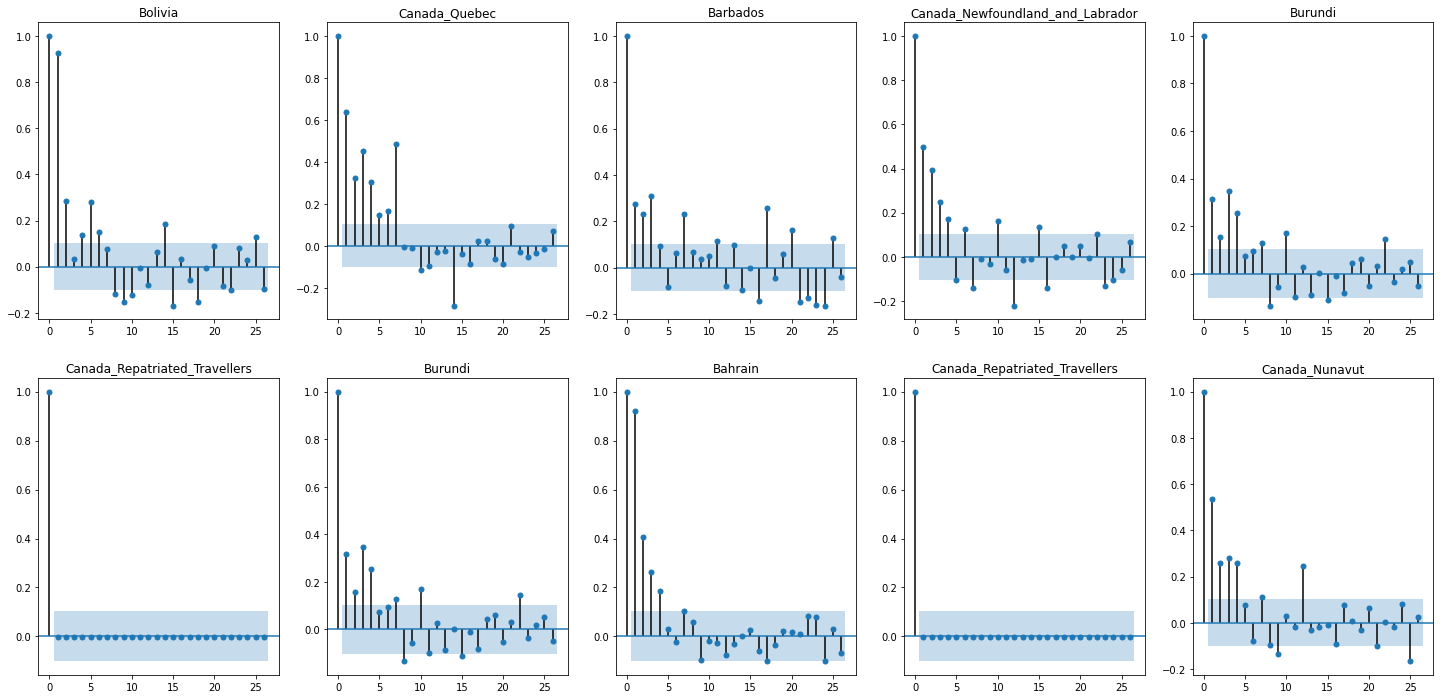

In [121]:
number=10
middle=number//2
indice=np.random.randint(0,len(Non_Stationnary),number)
fig,axs  = plt.subplots(2,middle,figsize=(5*middle,12))
j=0
for i in indice:
    series = pd.Series(data=new_data[new_data.columns[i]].values,index=new_data["dates"]).diff()
    series = series.loc[~series.isna()]
    h,k=j//middle,j%middle
    try:
        smt.graphics.plot_pacf(series.values,ax=axs[h][k],title=new_data.columns[i])
    except:
        print()
    j+=1

In [122]:
values=[]
values_1=[]
for i in range(1,len(Non_Stationnary)):
    series = pd.Series(data=new_data[Non_Stationnary[i]].values,index=new_data["dates"]).diff().diff().diff()
    series = series.loc[~series.isna()]
    values.append(adfuller(series)[1])
    values_1.append(kpss(series)[1])
test_12=pd.Series(data=values,index=Non_Stationnary[1:])
test_13=pd.Series(data=values_1,index=Non_Stationnary[1:])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-valu

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 <a list of 9 Text major ticklabel objects>)

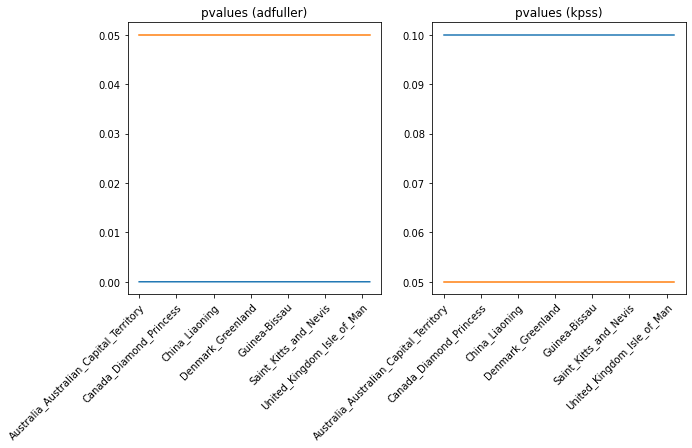

In [125]:
fig,ax =plt.subplots(1,2,figsize=(10,5))
test_12.plot(ax=ax[0],y="p_value",kind="line",title=r"pvalues (adfuller)")
ax[0].plot(range(len(test_12)),[0.05]*len(test_12))
# Rotate the tick labels and set their alignment.",
plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
plt.xticks( rotation=45)
test_13.plot(ax=ax[1],y="p_value",kind="line",title=r"pvalues (kpss)")
ax[1].plot(range(len(test_12)),[0.05]*len(test_12))
# Rotate the tick labels and set their alignment.
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.xticks( rotation=45)